# Diwali Sales Analysis

## Importing, Analyzing and Cleaning Data

In [1]:
# import numpy, pandas,matplotlib and seaborn for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# importing file for analysis and using encoding to remove any encoded error
# Checking Rows and Columns in a file
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')
df.shape

(11251, 15)

In [3]:
# Actual Data
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
# Description of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# Dropping Status and unnamed1 Columns as they all are null
df.drop(['Status','unnamed1'],axis =1, inplace = True)

In [6]:
# Check for Null Values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.shape

(11251, 13)

In [8]:
df.dropna(inplace = True)

In [9]:
df.shape

(11239, 13)

In [10]:
# Changing datatype of amount from float to int
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtypes

dtype('int64')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
# If Renaming Columns is Required
#df.rename(columns = {'Marital_Status' : 'Married'}, inplace= True)

In [14]:
# Describe returns description of DataFrame(i.e. count, mean and std etc.)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
# Using describe for only int datatypes
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

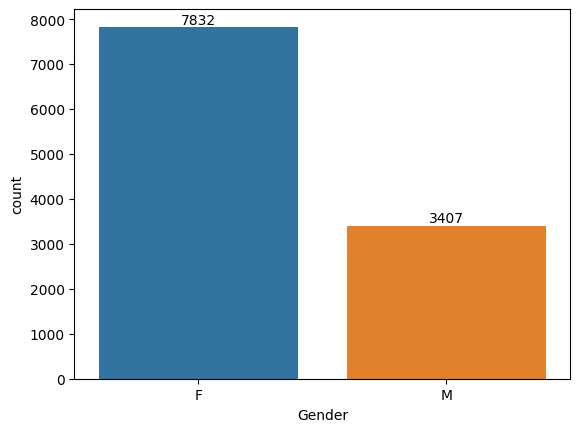

In [17]:
gx = sns.countplot(data = df, x ='Gender',hue = 'Gender')
for bar in gx.containers:
    gx.bar_label(bar)

<Axes: xlabel='Gender', ylabel='Amount'>

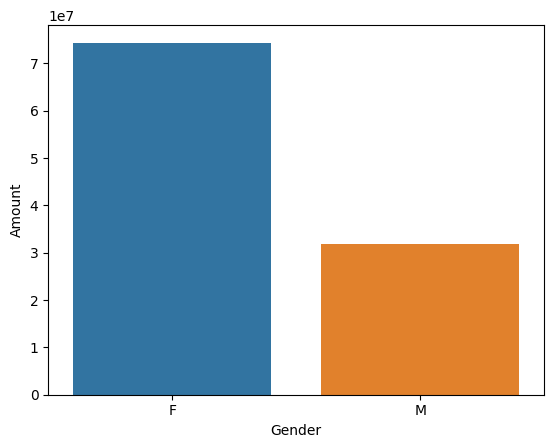

In [18]:
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(data = sales_gen, x = 'Gender', y = 'Amount',hue = 'Gender')

**From the above graphs we can see that most of the buyers are female and even the purchasing power of female are greater than men.**

### AGE

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

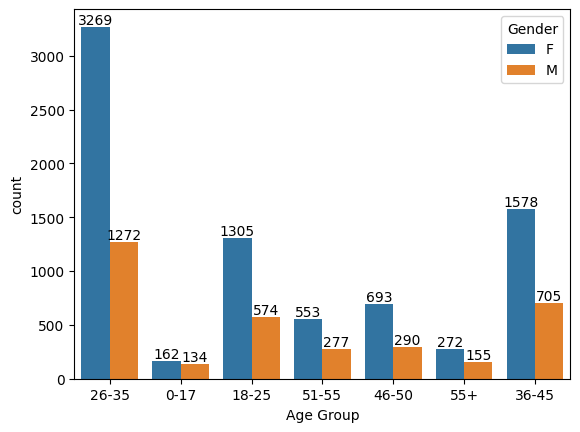

In [20]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

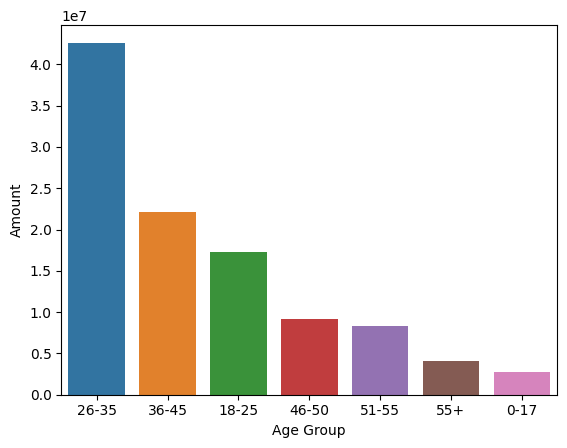

In [21]:
# Age vs Amount
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

sns.barplot(data = sales_age, x = 'Age Group', y = 'Amount',hue = 'Age Group')

**From the above graphs we can see that most of the buyers are of age group between 26-35 years and are female.**

### State

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

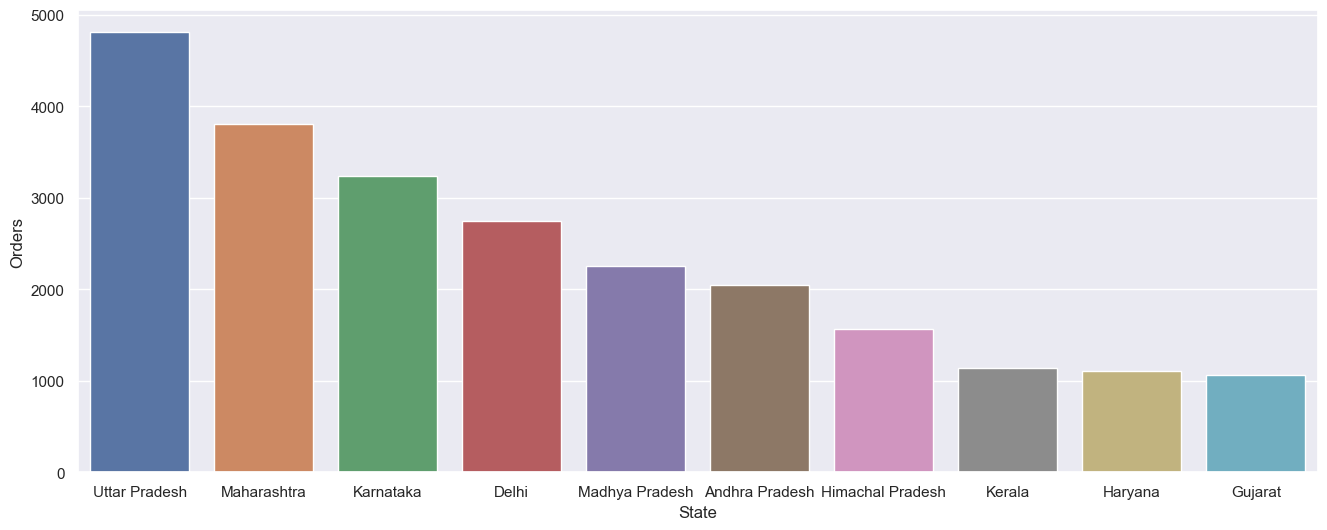

In [23]:
# Total Number of Orders from top 10 states
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize' : (16,6)})
sns.barplot(data= sales_state, x = 'State', y = 'Orders', hue = 'State')

<Axes: xlabel='State', ylabel='Amount'>

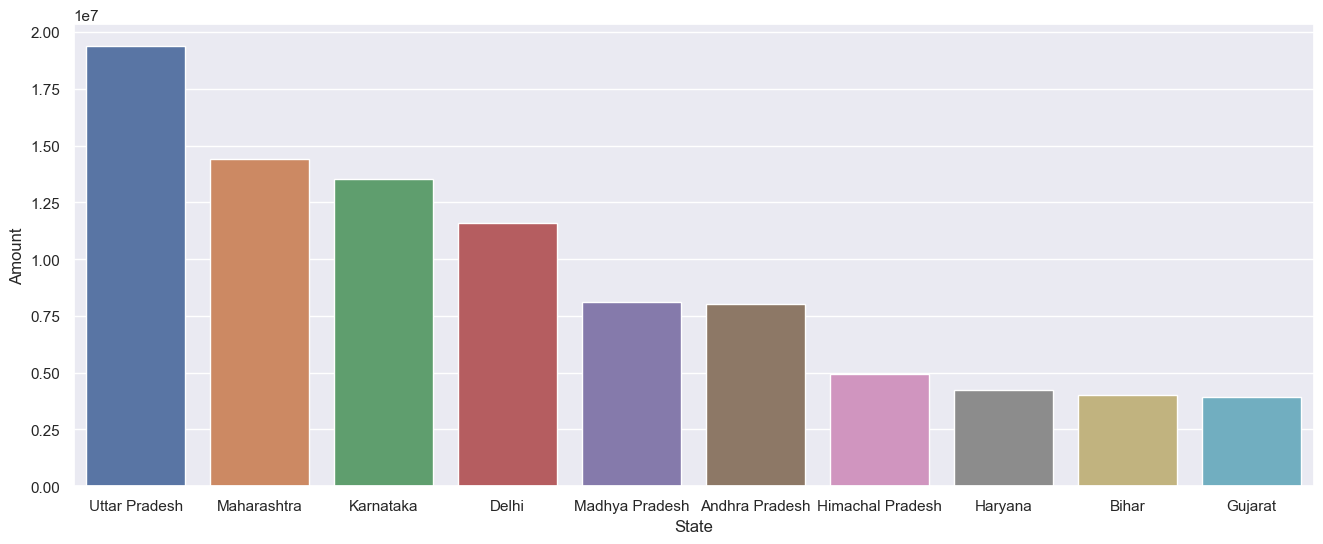

In [24]:
# Total Amount from top 10 states
sales_states = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize' : (16,6)})
sns.barplot(data= sales_states, x = 'State', y = 'Amount', hue = 'State')

**From the above graphs we can se that most of the orders/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.**

### Marital Status

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

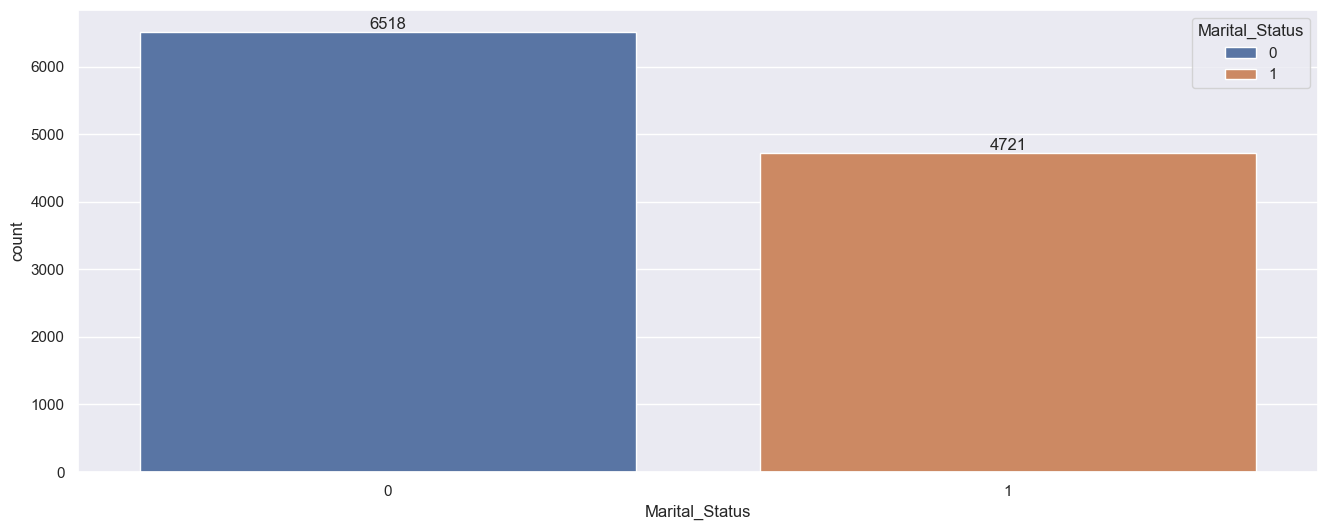

In [30]:
mx = sns.countplot(data  = df, x = 'Marital_Status',hue = 'Marital_Status')

for bars in mx.containers:
    mx.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

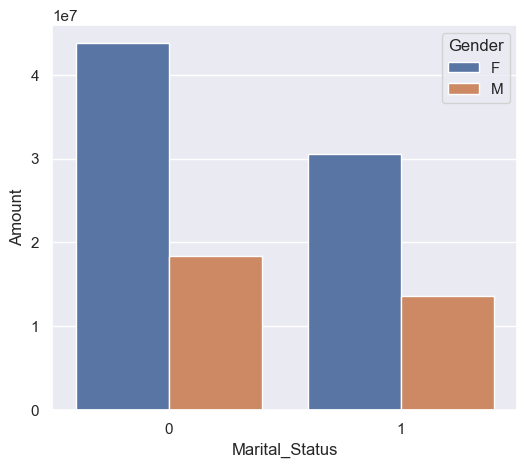

In [32]:
sales_mg = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

sns.set(rc = {'figure.figsize' : (6,5)})
sns.barplot(data = sales_mg,x = 'Marital_Status',y = 'Amount',hue = 'Gender')

<b>From the above graphs we can see that most of the buyers are unmarried(women) and they have high purchasing power.</b>

### Occupation

In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

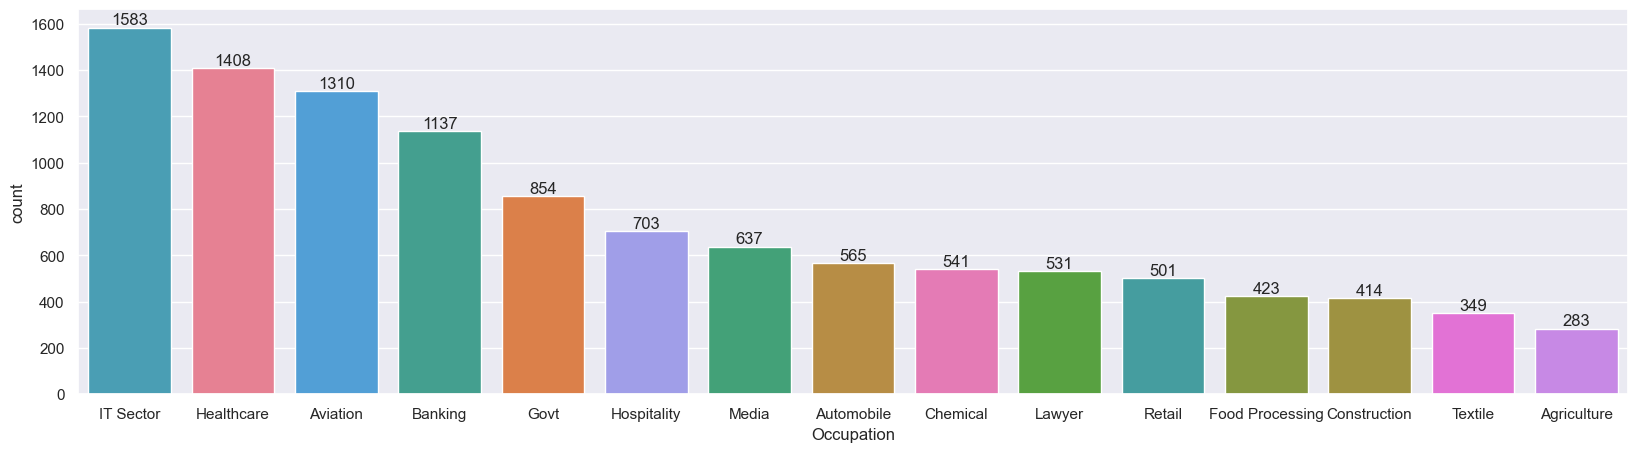

In [34]:
sns.set(rc = {'figure.figsize' : (20,5)})
ox = sns.countplot(data = df, x = 'Occupation',hue = 'Occupation',order=df['Occupation'].value_counts().index)

for bars in ox.containers:
    ox.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

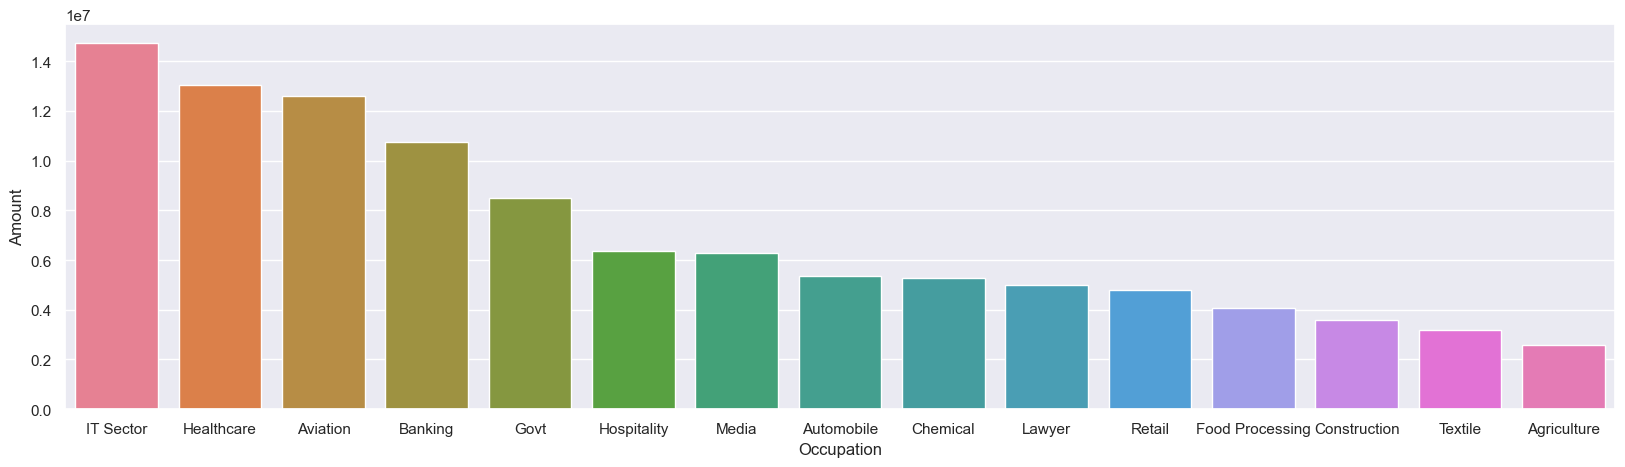

In [37]:
sales_occ = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(data = sales_occ, x = 'Occupation', y = 'Amount', hue = 'Occupation')

<b>From the above graphs we can see that most of the buyers are from IT, Aviation and Healthcare Sectors</b>

### Product Category

In [39]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

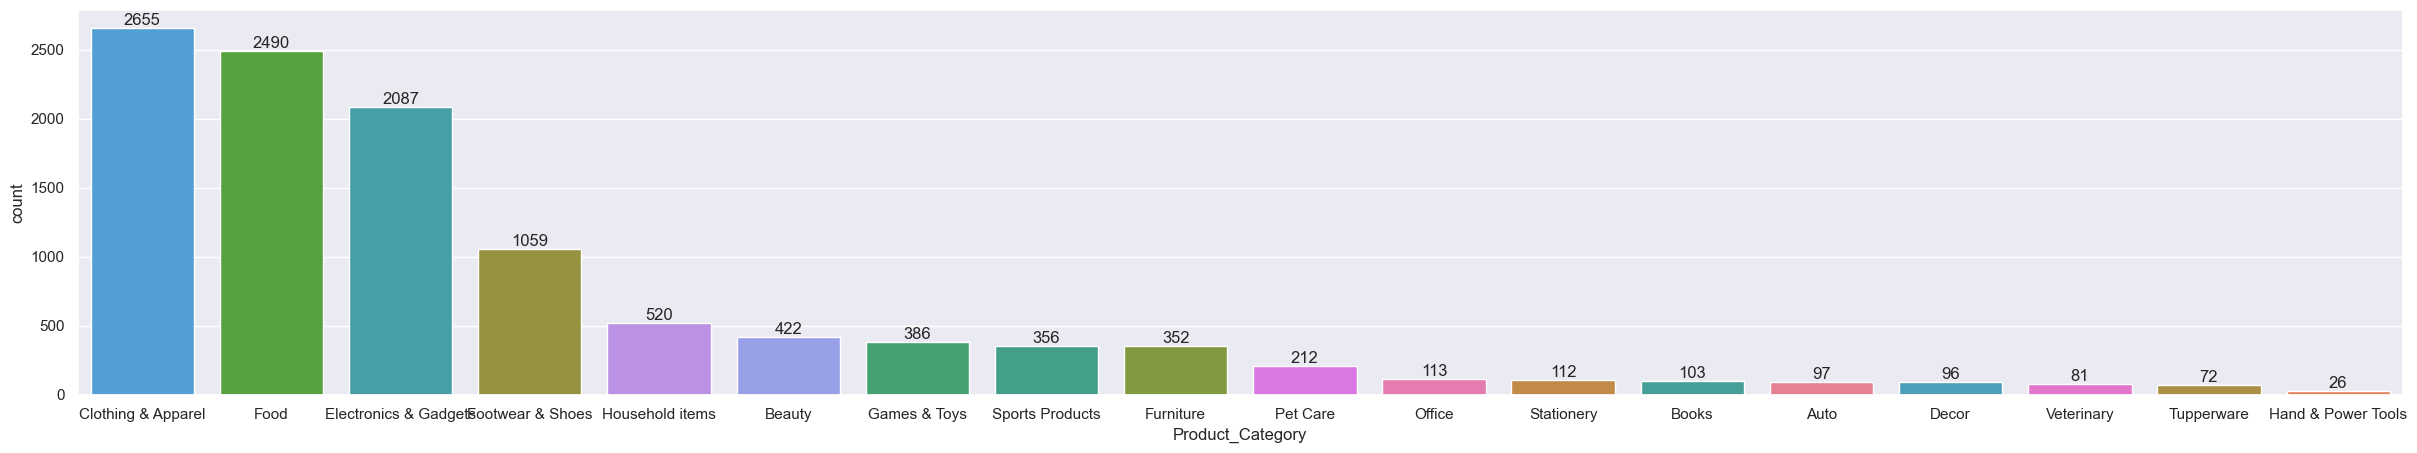

In [51]:
sns.set(rc = {'figure.figsize' : (30,5)})
px = sns.countplot(data = df, x = 'Product_Category',hue = 'Product_Category', order = df['Product_Category'].value_counts().index)
for bars in px.containers:
    px.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

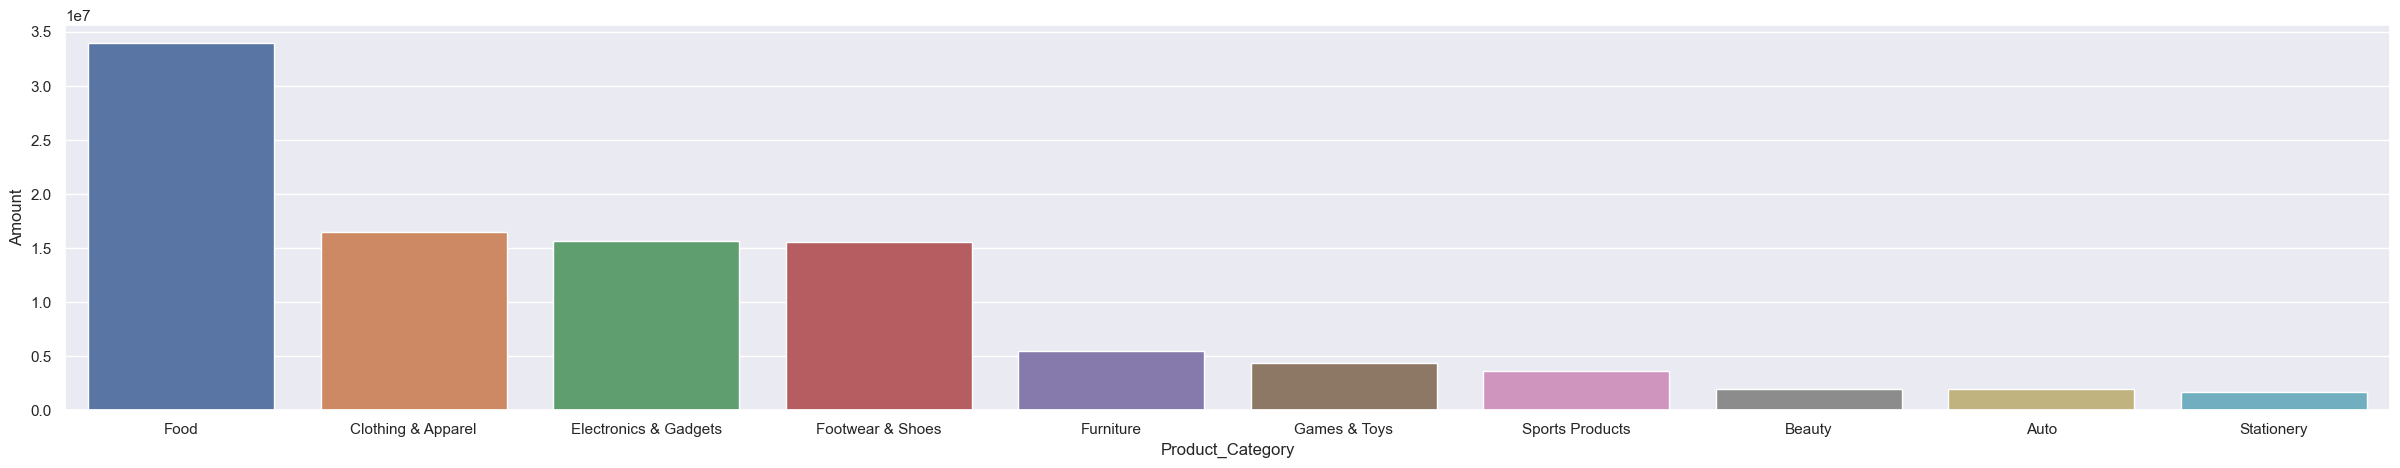

In [50]:
sales_pg = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending =  False).head(10)

sns.barplot(data = sales_pg, x = 'Product_Category', y= 'Amount', hue = 'Product_Category')

<b>From the above graphs we can see the most of the products sold are from Food, Footwear and Electronics Category</b>

<Axes: xlabel='Product_ID', ylabel='Orders'>

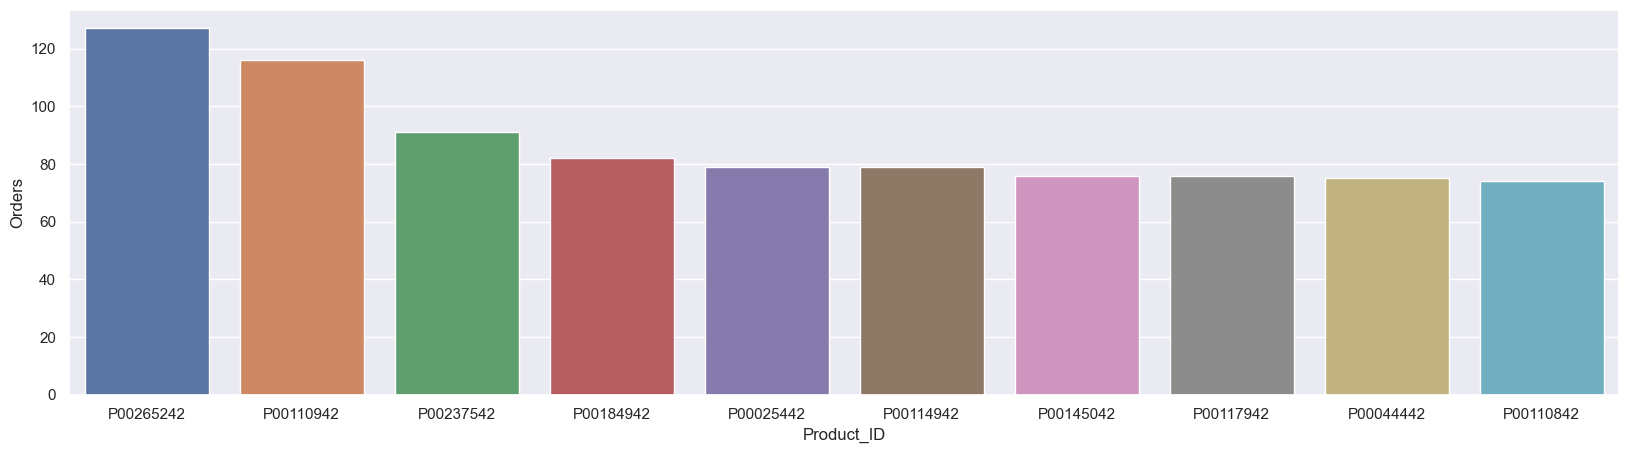

In [55]:
# Top 10 Most Sold Products
sales_po = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (20,5)})
sns.barplot(data = sales_po, x = 'Product_ID', y = 'Orders', hue = 'Product_ID')

<Axes: xlabel='Product_ID'>

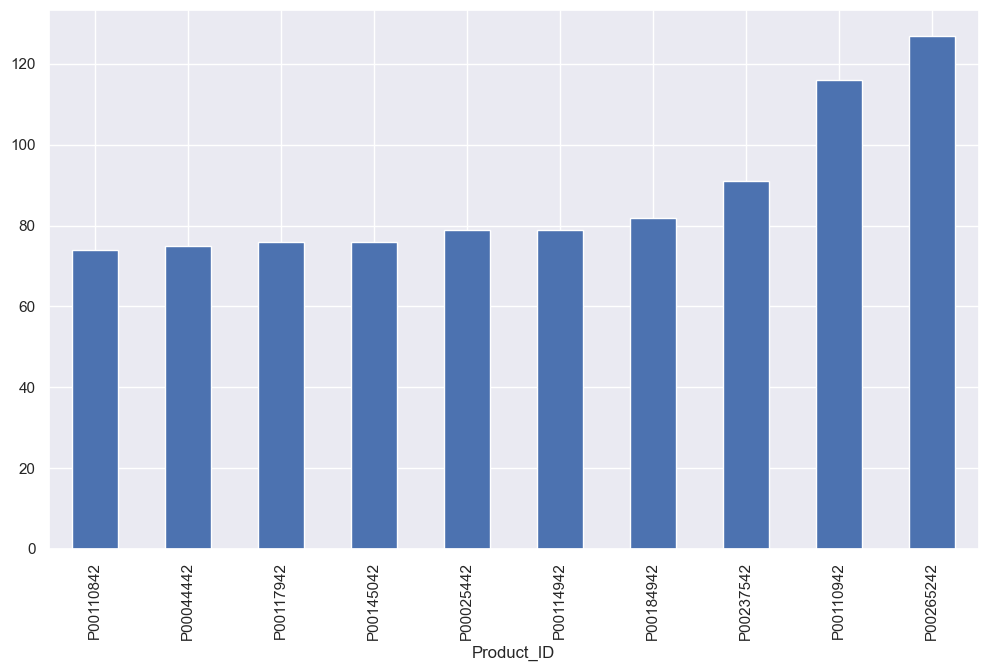

In [57]:
# Top 10 Most Sold Products
fig1, ax1 = plt.subplots(figsize = (12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = True).plot(kind = 'bar')

## Conclusion

<b>Married Women Age Group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics and Gadgets Category</b>